In [12]:
import sys
sys.path.insert(0, "..")
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from eis_toolkit.vector_processing.kriging_interpolation import kriging

In [13]:
data = {
    "elevation": [5.0, 20.0, 30.0, 50.0, 200.0, 10.0, 100.0, 10.0, 5.0, 80.0, 100.0, 75.0, 5.0, 40.0, 250.0],
    "geometry": [
        Point(24.943, 60.167), Point(25.041,60.292), Point(24.658, 60.204), Point(24.078, 60.25),
        Point(23.132, 60.383), Point(22.272, 60.451), Point(23.762, 61.499), Point(21.794, 61.484),
        Point(24.453, 60.994), Point(24.863, 60.632), Point(25.664, 60.982), Point(26.701, 60.869),
        Point(26.941, 60.464), Point(28.187, 61.058), Point(25.748, 62.242)]
}
gdf = gpd.GeoDataFrame(data, crs="3067")
gdf

,elevation,geometry
0,5.0,POINT (24.943 60.167)
1,20.0,POINT (25.041 60.292)
2,30.0,POINT (24.658 60.204)
3,50.0,POINT (24.078 60.250)
4,200.0,POINT (23.132 60.383)
5,10.0,POINT (22.272 60.451)
6,100.0,POINT (23.762 61.499)
7,10.0,POINT (21.794 61.484)
8,5.0,POINT (24.453 60.994)
9,80.0,POINT (24.863 60.632)


In [14]:
interpolated_values, out_meta = kriging(
    data=gdf,
    target_column="elevation",
    resolution=(0.005, 0.005),
    variogram_model="exponential",
    # method="universal",
)
df = pd.DataFrame(interpolated_values)
df

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,56.652234,56.700969,56.750689,56.801408,56.853138,56.905895,56.959690,57.014539,57.070455,57.127453,...,43.694521,43.755384,43.816166,43.876868,43.937489,43.998030,44.058492,44.118872,44.179173,44.239393
1,56.433999,56.481804,56.530597,56.580390,56.631198,56.683034,56.735914,56.789850,56.844857,56.900950,...,43.652647,43.713658,43.774588,43.835436,43.896202,43.956888,44.017491,44.078013,44.138454,44.198813
2,56.213911,56.260746,56.308571,56.357397,56.407241,56.458115,56.510035,56.563015,56.617070,56.672214,...,43.611654,43.672809,43.733881,43.794870,43.855777,43.916601,43.977343,44.038002,44.098578,44.159071
3,55.992025,56.037851,56.084667,56.132486,56.181323,56.231193,56.282110,56.334089,56.387146,56.441296,...,43.571553,43.632847,43.694057,43.755183,43.816225,43.877184,43.938058,43.998849,44.059556,44.120180
4,55.768404,55.813181,55.858947,55.905716,55.953505,56.002326,56.052197,56.103131,56.155144,56.208253,...,43.532357,43.593785,43.655128,43.716386,43.777559,43.838647,43.899649,43.960567,44.021401,44.082149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,66.213478,66.268992,66.324857,66.381075,66.437645,66.494567,66.551842,66.609469,66.667450,66.725783,...,105.342760,105.234814,105.127191,105.019889,104.912908,104.806248,104.699907,104.593886,104.488183,104.382798
412,66.374508,66.429999,66.485839,66.542029,66.598568,66.655457,66.712695,66.770284,66.828222,66.886511,...,105.429498,105.321519,105.213862,105.106526,104.999510,104.892815,104.786438,104.680381,104.574642,104.469220
413,66.534392,66.589860,66.645674,66.701835,66.758343,66.815197,66.872399,66.929948,66.987844,67.046087,...,105.514749,105.406742,105.299056,105.191691,105.084646,104.977920,104.871513,104.765424,104.659653,104.554199
414,66.693136,66.748580,66.804368,66.860499,66.916974,66.973794,67.030958,67.088466,67.146319,67.204516,...,105.598516,105.490485,105.382775,105.275386,105.168316,105.061564,104.955131,104.849016,104.743218,104.637736


In [15]:
x_min, y_min, x_max, y_max = gdf.geometry.total_bounds
print(f"x_min = {x_min}")
print(f"x_max = {x_max}")
print(f"y_min = {y_min}")
print(f"y_max = {y_max}")

x_min = 21.794
x_max = 28.187
y_min = 60.167
y_max = 62.242


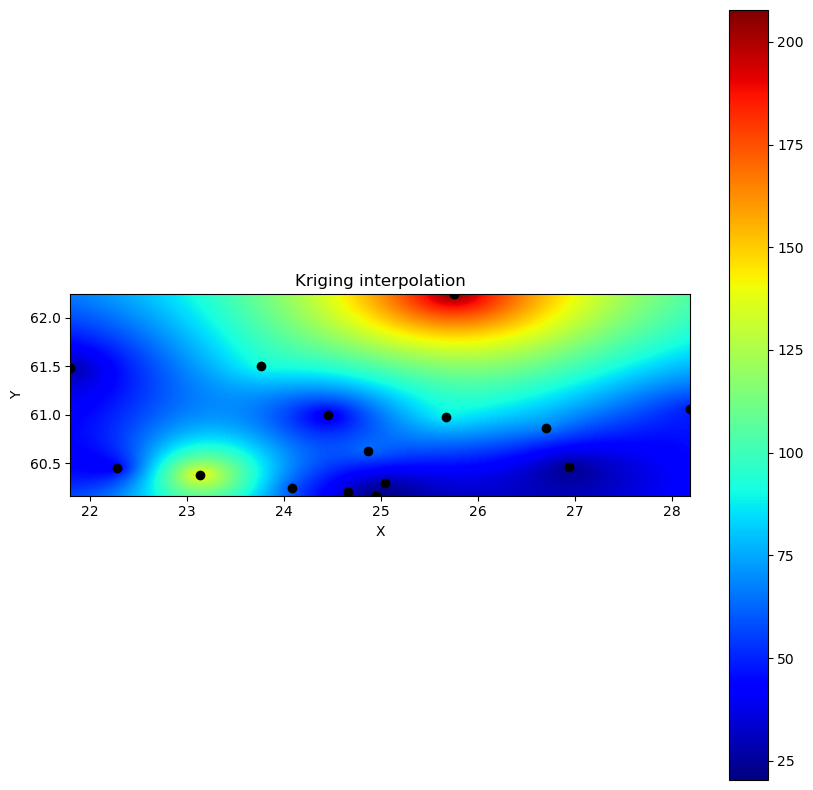

In [16]:
x_coordinates = gdf.geometry.x
y_coordinates = gdf.geometry.y
plt.figure(figsize=(10,10))
plt.imshow(interpolated_values, cmap="jet", extent=[x_min, x_max, y_min, y_max], origin="lower")
plt.colorbar()
plt.scatter(x_coordinates, y_coordinates, c="k")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Kriging interpolation")
plt.show()